## Highlights_Extractor

#### Importing Libraries

In [1]:
import cv2                                         # for capturing videos
import math                                        # for mathematical operations
import matplotlib.pyplot as plt                    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image              # for preprocessing the images
import numpy as np                                 # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize               # for resizing images

In [2]:
## Read the video, extract frames from it and save them as images

In [3]:
# import the necessary packages
import cv2
import imutils
import math 

frame_list=[]
count = 0
videoFile = "videoplayback.mp4"     #input video file
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5)              #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1)            #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="vidimg/frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
        frame_list.append(filename)
cap.release()
print ("Done!")

Done!


In [4]:
#Finding the emotion of each frame
from deepface import DeepFace
emotions_list=[]
for x in frame_list:
    face_analysis = DeepFace.analyze(img_path = x, actions = ['emotion'], enforce_detection=False)
    emotions_list.append(face_analysis["dominant_emotion"])

In [5]:
# Creating a Dataset for Frames and the emotion in the frames
df=pd.read_csv('framesdataset.csv')
df['FrameID']=frame_list
df['Emotion']=emotions_list

df.to_csv('framesdataset.csv',index=False)

In [6]:
df

,FrameID,Emotion
0,vidimg/frame0.jpg,angry
1,vidimg/frame1.jpg,neutral
2,vidimg/frame2.jpg,neutral
3,vidimg/frame3.jpg,fear
4,vidimg/frame4.jpg,neutral
...,...,...
685,vidimg/frame685.jpg,angry
686,vidimg/frame686.jpg,angry
687,vidimg/frame687.jpg,happy
688,vidimg/frame688.jpg,happy


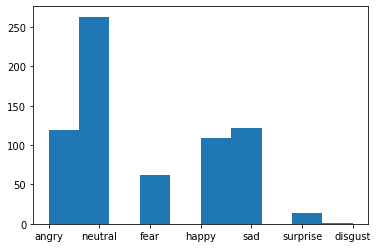

In [8]:
plt.hist(df['Emotion'])
plt.show()  # To check the types of emotions captured in the frames

In [9]:
#seperating the data set to goal moments, loss moments and happy moments as lists
list_loss_moments=[]
list_happy_moments=[]
list_goal=[]
i=0
for x in emotions_list:
    if(x=="angry"or x=="fear"or x=="sad" or x=="disgust"):
        list_loss_moments.append(frame_list[i])
    elif(x=="happy"):
        list_happy_moments.append(frame_list[i])
    elif(x=="surprise"):
        list_goal.append(frame_list[i])
    i=i+1
    if i>len(emotions_list):
        break

In [10]:
list_goal

['vidimg/frame82.jpg',
 'vidimg/frame133.jpg',
 'vidimg/frame246.jpg',
 'vidimg/frame247.jpg',
 'vidimg/frame248.jpg',
 'vidimg/frame249.jpg',
 'vidimg/frame376.jpg',
 'vidimg/frame391.jpg',
 'vidimg/frame392.jpg',
 'vidimg/frame433.jpg',
 'vidimg/frame452.jpg',
 'vidimg/frame454.jpg',
 'vidimg/frame486.jpg',
 'vidimg/frame594.jpg']

In [11]:
#copying the goal moments, loss moments and happy moments from main image folder to sub folders for writing as output videos 
## Here if x is a goal moment, then x-y to x+y frames have been added where the value of y factor = 5 frames

import shutil
length=len(frame_list)

for i in list_goal:
    fn=i[7:]
    y=i[12:-4]
    p=int(y)-5
    q=int(y)+5
    z=p
    while(z<q):
        if (z>=length) or (z<0):
            break;
        else:
            src_path = r"C:\Users\user\Documents\vidimg\\frame"+str(z)+".jpg"
            dst_path = r"C:\Users\user\Documents\goal_images\\frame"+str(z)+".jpg"
            shutil.copy(src_path, dst_path)
        z=z+1


for i in list_happy_moments:
    fn=i[7:]
    y=i[12:-4]
    p=int(y)-5
    q=int(y)+5
    z=p
    while(z<q):
        if (z>=length) or (z<0):
            break;
        else:
            src_path = r"C:\Users\user\Documents\vidimg\\frame"+str(z)+".jpg"
            dst_path = r"C:\Users\user\Documents\happy_images\\frame"+str(z)+".jpg"
            shutil.copy(src_path, dst_path)
        z=z+1
        
for i in list_loss_moments:
    fn=i[7:]
    y=i[12:-4]
    p=int(y)-5
    q=int(y)+5
    z=p
    while(z<q):
        if z>=length or z<0:
            break
        else:
            src_path = r"C:\Users\user\Documents\vidimg\\frame"+str(z)+".jpg"
            dst_path = r"C:\Users\user\Documents\loss_images\\frame"+str(z)+".jpg"
            shutil.copy(src_path, dst_path)
        z=z+1
        

In [22]:
#writing back the frames as three output videos : out_goal.mp4, out_happy.mp4, out_loss.mp4 
#which contain the goal moments, happy moments and loss moments respectively. 

import glob

img_array = []
for filename in glob.glob('C:/Users/user/Documents/goal_images/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
out = cv2.VideoWriter('out_goal.mp4',cv2.VideoWriter_fourcc(*'DIVX'),10,size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

img_array = []
for filename in glob.glob('C:/Users/user/Documents/happy_images/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
out = cv2.VideoWriter('out_happy.mp4',cv2.VideoWriter_fourcc(*'DIVX'),10,size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

img_array = []
for filename in glob.glob('C:/Users/user/Documents/loss_images/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
out = cv2.VideoWriter('out_loss.mp4',cv2.VideoWriter_fourcc(*'DIVX'),10,size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()



In [23]:
#Playing the Output Videos for Goal Moments, Happy Moments and Loss Moments

from IPython.display import Video

from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="C:/Users/user/Documents/out_goal.mp4" type="video/mp4">
</video>
""")

In [24]:
from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="C:/Users/user/Documents/out_happy.mp4" type="video/mp4">
</video>
""")

In [25]:
from IPython.display import HTML
HTML("""
<video width="320" height="240" controls>
  <source src="C:/Users/user/Documents/out_loss.mp4" type="video/mp4">
</video>
""")

In [16]:
###End